13.75
dict_keys(['z', 'conf. time [Mpc]', 'x_e', 'x_fid', 'xe_pert', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])
0.014999848424944371


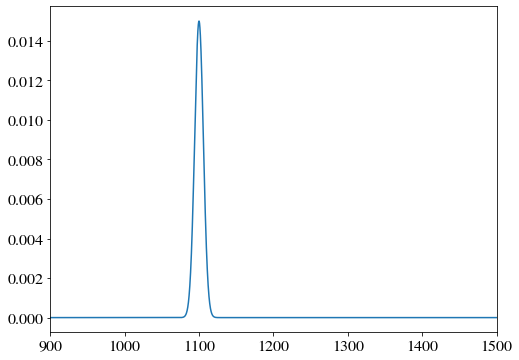

In [26]:
import classy as Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

N = 1
zi = 1100
amp = .015

zmin_pert = 300
zmax_pert = 2500

dz = (zmax_pert - zmin_pert)/160.0
width = dz/np.sqrt(2*np.log(2))

spline_width = dz

print(spline_width)

amp_str = "{}".format(amp)

#print(amp_array[112])
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':0,
                   #'reio_parametrization': 'reio_none',
                   'perturb_xe': 'yes',
                   'input_verbose': 1,
                   #'use_spline_xe_pert': 'yes',
                   'xe_pert_num': N,
                   'zmin_pert': zmin_pert,
                   'zmax_pert': zmax_pert,
                   'xe_pert_amps': amp_str,
                   'xe_single_zi': zi,
                   'thermo_Nz_lin': 80000
                   #'xe_single_width': spline_width
                   }  

M = Class.Class()
M.set(common_settings)

M.compute()

thermo = M.get_thermodynamics()
print (thermo.keys())


fig, ax = plt.subplots()
print(np.max(thermo['xe_pert']))
ax.plot(thermo['z'], thermo['xe_pert'])
#ax.plot(thermo['z'], thermo['x_fid'])
#ax.set_xscale('log')
ax.set_xlim([900, 1500])
plt.show()

In [12]:
amplitudes=np.linspace(-.1, .1, 5)

gcls = []
gll = np.zeros(2500)
for qi in amplitudes:
    amp_array = np.zeros(N)
    #amp_array[pert_idx] = qi
    #amp_array[0] = .1


    amp_arrstr = np.char.mod('%f', amp_array)
    amp_str = ",".join(amp_arrstr)

    #print(amp_array[112])
    common_settings = {'output' : 'tCl,pCl,lCl',
                       # LambdaCDM parameters
                       'h':0.6781,
                       'omega_b':0.02238280,
                       'omega_cdm':0.1201075,
                       'A_s':2.100549e-09,
                       'n_s':0.9660499,
                       'lensing': 'yes',
                       #'tau_reio':0.05430842,
                       'thermodynamics_verbose':0,
                       'reio_parametrization': 'reio_none',
                       'perturb_xe': 'yes',
                       'xe_pert_num': N,
                       'zmin_pert': zmin_pert,
                       'zmax_pert': zmax_pert,
                       'xe_pert_amps': amp_str
                       }  

    M = Class.Class()
    M.set(common_settings)
    M.compute()

    cls = M.lensed_cl(2500)
    if qi == -.1:
        print(cls.keys())
    gll = cls['ell'][2:]
    gcls.append(cls['tt'][2:])

gcls = np.stack(gcls)
print(gll)

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])
[   2    3    4 ... 2498 2499 2500]


(21, 2499)


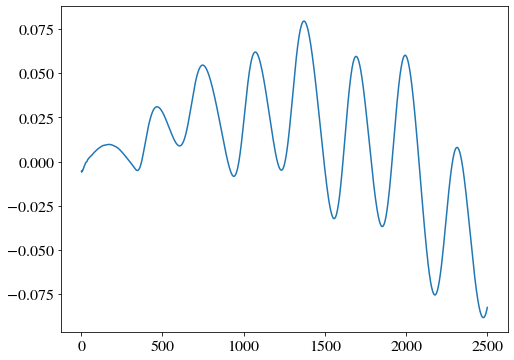

In [27]:
fig,ax = plt.subplots()

fid = gcls[10]

print(gcls.shape)

derivs = np.gradient(gcls, .01, axis=0)

response = derivs[10]/fid

ax.plot(gll, response)
plt.show()

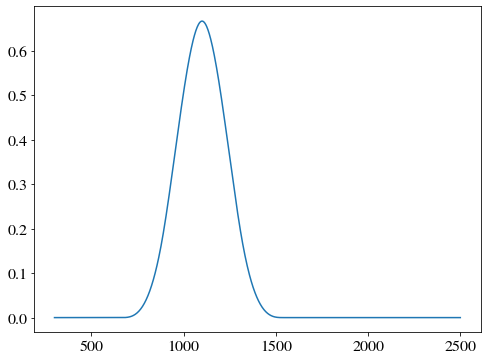

In [32]:
def cubic_m4_spline(z, zi, h):
    q = np.abs(z-zi)/h
    if(q<=1):
        return (1.0/6.0)*((2-q)**3 - 4.*(1-q)**3)
    elif(q>1 and q<=2):
        return (1.0/6.0)*(2-q)**3
    else:
        return 0
    
zrange = np.linspace(300, 2500, 900)
zi = 1100
h = 2200./10

fig,ax = plt.subplots()

spline = [cubic_m4_spline(z, zi, h) for z in zrange]

ax.plot(zrange, spline)
plt.show()

In [14]:
print(np.arange(2, 2501))

[   2    3    4 ... 2498 2499 2500]


In [ ]:
N = 1
zi = 1100
amp = .015

zmin_pert = 300
zmax_pert = 2500

dz = (zmax_pert - zmin_pert)/160.0
width = dz/np.sqrt(2*np.log(2))

spline_width = dz

print(spline_width)

amp_str = "{}".format(amp)

#print(amp_array[112])
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':0,
                   #'reio_parametrization': 'reio_none',
                   'perturb_xe': 'no',
                   'input_verbose': 1,
                   #'use_spline_xe_pert': 'yes',
                   'thermo_Nz_lin': 80000
                   #'xe_single_width': spline_width
                   }  

M = Class.Class()
M.set(common_settings)

M.compute()

thermo = M.get_thermodynamics()